In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpe8t3rjqq/pubring.gpg' created
gpg: /tmp/tmpe8t3rjqq/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········


In [2]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
!pip install -q keras

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pathlib import Path
import shutil
from PIL import Image
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
def load_data(data_path: str, test_size=0.2, random_state=42, info=False):
    """Load data from file.
    
    Args:
        data_path: str, file path to read data
        test_size: float, the ratio of test / all
        random_state: int, random seed to split data
        info: bool, control info print
    Returns:
        train_data: np.array, train set
        test_data: np.array, test set
    """
    # imgs = [np.array(Image.open(d)) for d in Path(data_path).iterdir()]
    imgs = []
    for d in Path(data_path).iterdir():
        if info:
            print('Load image: ' + d.name)
        imgs.append(np.array(Image.open(d)))
    data = np.array(imgs)
    train_data, test_data = train_test_split(
        data, test_size=test_size, random_state=random_state)
    return train_data, test_data

In [0]:
def load_label(label_path: str, test_size=0.2, random_state=42):
    """Load label from file.
    
    Args:
        label_path: str, file path to read label
        test_size: float, the ratio of test / all, 
            this arg should match up test_size in load_data
        random_state: int, random seed to split data
            this arg should match up random_state in load_data
    """
    with open(label_path, 'r') as f:
        labels = f.readline()
    train_label, test_label = train_test_split(
        labels.split('\t'), test_size=test_size, random_state=random_state)
    le = LabelEncoder()
    le.fit(train_label)
    return le.transform(train_label), le.transform(test_label)

In [4]:
train_label, test_label = load_label('./drive/data/FacePlace/Asian.txt')
train_data, test_data = load_data('./drive/data/FacePlace/Asian/', info=True)
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)
train_label, val_label = train_test_split(train_label, test_size=0.2, random_state=42)

Load image: AM0316_1101_90L.jpg
Load image: AM0316_1101_90R.jpg
Load image: AM0316_1101_NE.jpg
Load image: AM0316_2201_00F.jpg
Load image: AM0316_2201_30L.jpg
Load image: AM0316_2201_30R.jpg
Load image: AM0316_2201_45L.jpg
Load image: AM0316_1100_90R.jpg
Load image: AM0316_2201_45R.jpg
Load image: AM0316_1100_90L.jpg
Load image: AM0316_1101_45L.jpg
Load image: AM0316_1101_30R.jpg
Load image: AM0316_1101_30L.jpg
Load image: AM0316_1101_00F.jpg
Load image: AM0316_1101_45R.jpg
Load image: AM0316_1100_60R.jpg
Load image: AM0316_2201_60L.jpg
Load image: AM0317_1100_45L.jpg
Load image: AM0317_1100_60R.jpg
Load image: AM0317_1100_90L.jpg
Load image: AM0317_1100_90R.jpg
Load image: AM0317_1100_NE.jpg
Load image: AM0316_2201_90R.jpg
Load image: AM0317_2201_00F.jpg
Load image: AM0316_2201_NE.jpg
Load image: AM0317_1100_30L.jpg
Load image: AM0317_1100_30R.jpg
Load image: AM0316_2201_60R.jpg
Load image: AM0317_1100_45R.jpg
Load image: AM0317_1100_60L.jpg
Load image: AM0317_1100_00F.jpg
Load image:


Load image: AF0330_2101_90R.jpg
Load image: AF0330_2101_NE.jpg
Load image: AF0330_2101_60R.jpg
Load image: AF0330_2101_30R.jpg
Load image: AF0330_2101_90L.jpg
Load image: AF0330_2101_00F.jpg
Load image: AF0330_2101_45L.jpg
Load image: AF0330_2101_30L.jpg
Load image: AF0330_2101_45R.jpg
Load image: AF0331_1100_00F.jpg
Load image: AF0330_2101_60L.jpg
Load image: AF0331_1100_30L.jpg
Load image: AF0331_1101_30R.jpg
Load image: AF0331_1100_30R.jpg
Load image: AF0331_1100_90R.jpg
Load image: AF0331_1101_30L.jpg
Load image: AF0331_1100_45L.jpg
Load image: AF0331_1100_90L.jpg
Load image: AF0331_1100_60R.jpg
Load image: AF0331_1101_00F.jpg
Load image: AF0331_1101_45L.jpg
Load image: AF0331_1100_60L.jpg
Load image: AF0331_1100_45R.jpg
Load image: AF0331_1101_45R.jpg
Load image: AF0331_2201_45R.jpg
Load image: AF0331_1101_60L.jpg
Load image: AF0331_1101_90R.jpg
Load image: AF0331_1101_90L.jpg
Load image: AF0331_1101_NE.jpg
Load image: AF0331_2201_30L.jpg
Load image: AF0331_2201_30R.jpg
Load imag

Load image: AF0308_2201_30L.jpg
Load image: AF0308_2201_45R.jpg
Load image: AF0308_2201_30R.jpg
Load image: AF0308_2201_60R.jpg
Load image: AF0308_2201_90L.jpg
Load image: AF0308_2201_60L.jpg
Load image: AF0309_1100_00F.jpg
Load image: AF0309_1100_30L.jpg
Load image: AF0309_1100_DI.jpg
Load image: AF0309_1100_HA.jpg
Load image: AF0309_1100_NE.jpg
Load image: AF0309_1100_SA.jpg
Load image: AF0309_1100_SU.jpg
Load image: AF0309_2201_00F.jpg
Load image: AF0309_2201_30L.jpg
Load image: AF0309_2201_30R.jpg
Load image: AF0309_2201_45L.jpg
Load image: AF0309_1100_30R.jpg
Load image: AF0309_2201_45R.jpg
Load image: AF0309_2201_60L.jpg
Load image: AF0309_2201_60R.jpg
Load image: AF0309_1100_60L.jpg
Load image: AF0309_1100_45L.jpg
Load image: AF0309_1100_90L.jpg
Load image: AF0309_1100_90R.jpg
Load image: AF0309_1100_60R.jpg
Load image: AF0309_1100_45R.jpg
Load image: AF0309_1100_CO.jpg
Load image: AF0309_2201_90L.jpg
Load image: AF0310_1101_90L.jpg
Load image: AF0309_2201_90R.jpg
Load image: AF

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) # randomly flip images
datagen.fit(train_data)

In [0]:
def resnet(input_shape: tuple, classes: int):
    conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential([
        conv_base,
        Flatten(),
        Dense(512, activation='relu'),
        Dense(classes, activation='softmax')
    ])
    conv_base.trainable = False
    model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [7]:
model = resnet(input_shape=train_data[0].shape, classes=train_label.max() + 1)

history = model.fit_generator(
            datagen.flow(train_data, train_label, batch_size=20),
            epochs=80,
            validation_data=(val_data, val_label))

94658560/94653016 [==============================] - 1s 0us/step
Epoch 1/80
42/42 [==============================] - 20s 482ms/step - loss: 3.9512 - acc: 0.0679 - val_loss: 4.0518 - val_acc: 0.0340
Epoch 2/80
42/42 [==============================] - 16s 381ms/step - loss: 2.8429 - acc: 0.2990 - val_loss: 4.0404 - val_acc: 0.0340
Epoch 3/80
42/42 [==============================] - 16s 383ms/step - loss: 2.2609 - acc: 0.4431 - val_loss: 4.0960 - val_acc: 0.0340
Epoch 4/80
42/42 [==============================] - 16s 389ms/step - loss: 1.7189 - acc: 0.5586 - val_loss: 4.1585 - val_acc: 0.0340
Epoch 5/80
 8/42 [====>.........................] - ETA: 7s - loss: 1.2806 - acc: 0.6750

42/42 [==============================] - 16s 383ms/step - loss: 1.3622 - acc: 0.6396 - val_loss: 4.1498 - val_acc: 0.0340
Epoch 6/80
42/42 [==============================] - 16s 387ms/step - loss: 1.3564 - acc: 0.6337 - val_loss: 4.1890 - val_acc: 0.0340
Epoch 7/80
42/42 [==============================] - 16s 381ms/step - loss: 1.0675 - acc: 0.7016 - val_loss: 4.2035 - val_acc: 0.0388
Epoch 8/80
42/42 [==============================] - 16s 387ms/step - loss: 1.0054 - acc: 0.7171 - val_loss: 4.1797 - val_acc: 0.0291
Epoch 9/80
42/42 [==============================] - 16s 383ms/step - loss: 0.9031 - acc: 0.7540 - val_loss: 4.3485 - val_acc: 0.0243
Epoch 10/80
38/42 [==========================>...] - ETA: 1s - loss: 0.9445 - acc: 0.7671

42/42 [==============================] - 16s 381ms/step - loss: 0.9431 - acc: 0.7653 - val_loss: 4.2964 - val_acc: 0.0243
Epoch 11/80
42/42 [==============================] - 16s 386ms/step - loss: 0.8023 - acc: 0.7671 - val_loss: 4.3205 - val_acc: 0.0243
Epoch 12/80
42/42 [==============================] - 16s 379ms/step - loss: 0.6345 - acc: 0.8231 - val_loss: 4.2793 - val_acc: 0.0243
Epoch 13/80
42/42 [==============================] - 16s 382ms/step - loss: 0.6973 - acc: 0.8004 - val_loss: 4.3330 - val_acc: 0.0243
Epoch 14/80
42/42 [==============================] - 16s 383ms/step - loss: 0.8132 - acc: 0.8004 - val_loss: 4.4363 - val_acc: 0.0243
Epoch 15/80
40/42 [===========================>..] - ETA: 0s - loss: 0.6238 - acc: 0.8138

42/42 [==============================] - 16s 378ms/step - loss: 0.6299 - acc: 0.8123 - val_loss: 4.5047 - val_acc: 0.0194
Epoch 16/80
42/42 [==============================] - 16s 381ms/step - loss: 0.7488 - acc: 0.8052 - val_loss: 4.5330 - val_acc: 0.0097
Epoch 17/80
42/42 [==============================] - 16s 383ms/step - loss: 0.5149 - acc: 0.8397 - val_loss: 4.5448 - val_acc: 0.0243
Epoch 18/80
42/42 [==============================] - 16s 381ms/step - loss: 0.4971 - acc: 0.8505 - val_loss: 4.6688 - val_acc: 0.0146
Epoch 19/80
42/42 [==============================] - 16s 382ms/step - loss: 0.5361 - acc: 0.8505 - val_loss: 4.5624 - val_acc: 0.0194
Epoch 20/80
41/42 [============================>.] - ETA: 0s - loss: 0.5124 - acc: 0.8378

42/42 [==============================] - 16s 382ms/step - loss: 0.5256 - acc: 0.8374 - val_loss: 4.5269 - val_acc: 0.0243
Epoch 21/80
42/42 [==============================] - 15s 361ms/step - loss: 0.3893 - acc: 0.8964 - val_loss: 4.5543 - val_acc: 0.0243
Epoch 22/80
42/42 [==============================] - 15s 364ms/step - loss: 0.5974 - acc: 0.8266 - val_loss: 4.6860 - val_acc: 0.0097
Epoch 23/80
42/42 [==============================] - 16s 373ms/step - loss: 0.5763 - acc: 0.8314 - val_loss: 4.6229 - val_acc: 0.0291
Epoch 24/80
42/42 [==============================] - 16s 372ms/step - loss: 0.4243 - acc: 0.8928 - val_loss: 4.5950 - val_acc: 0.0194
Epoch 25/80
20/42 [=============>................] - ETA: 5s - loss: 0.2291 - acc: 0.9250

42/42 [==============================] - 16s 371ms/step - loss: 0.4028 - acc: 0.8719 - val_loss: 4.6569 - val_acc: 0.0146
Epoch 26/80
42/42 [==============================] - 15s 366ms/step - loss: 0.5376 - acc: 0.8600 - val_loss: 4.8110 - val_acc: 0.0243
Epoch 27/80
42/42 [==============================] - 15s 355ms/step - loss: 0.5307 - acc: 0.8636 - val_loss: 4.6437 - val_acc: 0.0340
Epoch 28/80
42/42 [==============================] - 16s 378ms/step - loss: 0.4816 - acc: 0.8493 - val_loss: 4.6468 - val_acc: 0.0243
Epoch 29/80
42/42 [==============================] - 16s 378ms/step - loss: 0.3058 - acc: 0.9202 - val_loss: 4.7579 - val_acc: 0.0146
Epoch 30/80
39/42 [==========================>...] - ETA: 0s - loss: 0.2181 - acc: 0.9474

42/42 [==============================] - 15s 369ms/step - loss: 0.2227 - acc: 0.9452 - val_loss: 4.7166 - val_acc: 0.0291
Epoch 31/80
42/42 [==============================] - 16s 383ms/step - loss: 0.3368 - acc: 0.9107 - val_loss: 4.7558 - val_acc: 0.0097
Epoch 32/80
42/42 [==============================] - 16s 384ms/step - loss: 0.5055 - acc: 0.8761 - val_loss: 4.9429 - val_acc: 0.0243
Epoch 33/80
42/42 [==============================] - 16s 385ms/step - loss: 0.5246 - acc: 0.8600 - val_loss: 4.8494 - val_acc: 0.0243
Epoch 34/80
42/42 [==============================] - 16s 387ms/step - loss: 0.3232 - acc: 0.9166 - val_loss: 4.7630 - val_acc: 0.0243
Epoch 35/80
41/42 [============================>.] - ETA: 0s - loss: 0.3833 - acc: 0.8805

42/42 [==============================] - 16s 375ms/step - loss: 0.3863 - acc: 0.8802 - val_loss: 4.7095 - val_acc: 0.0243
Epoch 36/80
42/42 [==============================] - 16s 377ms/step - loss: 0.3815 - acc: 0.9029 - val_loss: 4.6969 - val_acc: 0.0243
Epoch 37/80
42/42 [==============================] - 16s 379ms/step - loss: 0.5378 - acc: 0.8445 - val_loss: 4.8176 - val_acc: 0.0291
Epoch 38/80
42/42 [==============================] - 16s 382ms/step - loss: 0.3272 - acc: 0.8921 - val_loss: 4.8334 - val_acc: 0.0340
Epoch 39/80
42/42 [==============================] - 16s 372ms/step - loss: 0.4757 - acc: 0.8731 - val_loss: 4.8032 - val_acc: 0.0291
Epoch 40/80
20/42 [=============>................] - ETA: 6s - loss: 0.1984 - acc: 0.9475

42/42 [==============================] - 16s 382ms/step - loss: 0.3112 - acc: 0.9124 - val_loss: 4.6593 - val_acc: 0.0243
Epoch 41/80
42/42 [==============================] - 16s 377ms/step - loss: 0.4163 - acc: 0.8743 - val_loss: 4.7708 - val_acc: 0.0340
Epoch 42/80
42/42 [==============================] - 15s 368ms/step - loss: 0.3312 - acc: 0.8838 - val_loss: 4.7122 - val_acc: 0.0243
Epoch 43/80
42/42 [==============================] - 16s 378ms/step - loss: 0.2569 - acc: 0.9231 - val_loss: 5.1656 - val_acc: 0.0243
Epoch 44/80
42/42 [==============================] - 16s 371ms/step - loss: 0.3021 - acc: 0.9226 - val_loss: 4.9285 - val_acc: 0.0291
Epoch 45/80
39/42 [==========================>...] - ETA: 0s - loss: 0.3287 - acc: 0.8936

42/42 [==============================] - 16s 384ms/step - loss: 0.3499 - acc: 0.8921 - val_loss: 4.9752 - val_acc: 0.0340
Epoch 46/80
42/42 [==============================] - 16s 379ms/step - loss: 0.2454 - acc: 0.9326 - val_loss: 6.4195 - val_acc: 0.0243
Epoch 47/80
42/42 [==============================] - 16s 384ms/step - loss: 1.2272 - acc: 0.7957 - val_loss: 5.0748 - val_acc: 0.0340
Epoch 48/80
42/42 [==============================] - 16s 378ms/step - loss: 1.0049 - acc: 0.8749 - val_loss: 5.2548 - val_acc: 0.0291
Epoch 49/80
42/42 [==============================] - 16s 376ms/step - loss: 0.6188 - acc: 0.8731 - val_loss: 4.6717 - val_acc: 0.0340
Epoch 50/80
41/42 [============================>.] - ETA: 0s - loss: 0.3449 - acc: 0.8976

42/42 [==============================] - 16s 388ms/step - loss: 0.3485 - acc: 0.8981 - val_loss: 4.9727 - val_acc: 0.0340
Epoch 51/80
42/42 [==============================] - 16s 388ms/step - loss: 0.1838 - acc: 0.9547 - val_loss: 4.8249 - val_acc: 0.0340
Epoch 52/80
42/42 [==============================] - 16s 373ms/step - loss: 0.4880 - acc: 0.8779 - val_loss: 4.8676 - val_acc: 0.0340
Epoch 53/80
42/42 [==============================] - 16s 387ms/step - loss: 0.3676 - acc: 0.8886 - val_loss: 4.9347 - val_acc: 0.0340
Epoch 54/80
42/42 [==============================] - 16s 388ms/step - loss: 0.3358 - acc: 0.8898 - val_loss: 4.8772 - val_acc: 0.0340
Epoch 55/80
20/42 [=============>................] - ETA: 6s - loss: 0.1749 - acc: 0.9475

42/42 [==============================] - 16s 386ms/step - loss: 0.1956 - acc: 0.9393 - val_loss: 5.0952 - val_acc: 0.0340
Epoch 56/80
42/42 [==============================] - 16s 388ms/step - loss: 0.1882 - acc: 0.9535 - val_loss: 5.0761 - val_acc: 0.0388
Epoch 57/80
42/42 [==============================] - 16s 390ms/step - loss: 0.1565 - acc: 0.9631 - val_loss: 5.0321 - val_acc: 0.0340
Epoch 58/80
42/42 [==============================] - 16s 392ms/step - loss: 0.3838 - acc: 0.8767 - val_loss: 5.6853 - val_acc: 0.0340
Epoch 59/80
42/42 [==============================] - 16s 388ms/step - loss: 0.4875 - acc: 0.8826 - val_loss: 4.8740 - val_acc: 0.0340
Epoch 60/80
39/42 [==========================>...] - ETA: 0s - loss: 0.2225 - acc: 0.9167

42/42 [==============================] - 16s 379ms/step - loss: 0.2188 - acc: 0.9172 - val_loss: 5.4051 - val_acc: 0.0340
Epoch 61/80
42/42 [==============================] - 16s 385ms/step - loss: 0.2264 - acc: 0.9321 - val_loss: 5.1238 - val_acc: 0.0340
Epoch 62/80
42/42 [==============================] - 16s 382ms/step - loss: 0.1663 - acc: 0.9512 - val_loss: 5.1690 - val_acc: 0.0340
Epoch 63/80
42/42 [==============================] - 16s 379ms/step - loss: 0.1579 - acc: 0.9535 - val_loss: 5.2036 - val_acc: 0.0340
Epoch 64/80
42/42 [==============================] - 16s 383ms/step - loss: 0.5286 - acc: 0.8779 - val_loss: 4.8392 - val_acc: 0.0194
Epoch 65/80
41/42 [============================>.] - ETA: 0s - loss: 0.2984 - acc: 0.9171

42/42 [==============================] - 16s 379ms/step - loss: 0.2956 - acc: 0.9172 - val_loss: 5.0515 - val_acc: 0.0388
Epoch 66/80
42/42 [==============================] - 16s 379ms/step - loss: 0.1070 - acc: 0.9702 - val_loss: 5.1377 - val_acc: 0.0388
Epoch 67/80
42/42 [==============================] - 16s 373ms/step - loss: 0.3773 - acc: 0.8921 - val_loss: 5.2539 - val_acc: 0.0340
Epoch 68/80
42/42 [==============================] - 16s 380ms/step - loss: 0.2462 - acc: 0.9160 - val_loss: 5.7553 - val_acc: 0.0340
Epoch 69/80
42/42 [==============================] - 15s 367ms/step - loss: 0.3503 - acc: 0.9052 - val_loss: 5.6809 - val_acc: 0.0340
Epoch 70/80
20/42 [=============>................] - ETA: 5s - loss: 0.1167 - acc: 0.9675

42/42 [==============================] - 16s 371ms/step - loss: 0.3067 - acc: 0.9267 - val_loss: 5.1797 - val_acc: 0.0340
Epoch 71/80
42/42 [==============================] - 16s 372ms/step - loss: 0.3753 - acc: 0.8898 - val_loss: 5.2631 - val_acc: 0.0388
Epoch 72/80
42/42 [==============================] - 16s 369ms/step - loss: 0.1769 - acc: 0.9362 - val_loss: 5.8974 - val_acc: 0.0146
Epoch 73/80
42/42 [==============================] - 16s 381ms/step - loss: 0.3051 - acc: 0.8898 - val_loss: 6.0134 - val_acc: 0.0243
Epoch 74/80
42/42 [==============================] - 16s 385ms/step - loss: 0.3229 - acc: 0.8957 - val_loss: 5.5609 - val_acc: 0.0243
Epoch 75/80
39/42 [==========================>...] - ETA: 0s - loss: 0.1960 - acc: 0.9538

42/42 [==============================] - 16s 377ms/step - loss: 0.1851 - acc: 0.9571 - val_loss: 5.4752 - val_acc: 0.0340
Epoch 76/80
42/42 [==============================] - 16s 375ms/step - loss: 0.1388 - acc: 0.9619 - val_loss: 5.9072 - val_acc: 0.0291
Epoch 77/80
42/42 [==============================] - 16s 377ms/step - loss: 0.2143 - acc: 0.9350 - val_loss: 6.4715 - val_acc: 0.0243
Epoch 78/80
42/42 [==============================] - 16s 373ms/step - loss: 0.2815 - acc: 0.9238 - val_loss: 5.8025 - val_acc: 0.0437
Epoch 79/80
42/42 [==============================] - 15s 367ms/step - loss: 0.1386 - acc: 0.9446 - val_loss: 6.0081 - val_acc: 0.0340
Epoch 80/80
41/42 [============================>.] - ETA: 0s - loss: 0.4717 - acc: 0.8829

42/42 [==============================] - 16s 372ms/step - loss: 0.4587 - acc: 0.8862 - val_loss: 6.0684 - val_acc: 0.0340


In [0]:
model.save('./drive/model/asian_resnet.h5')

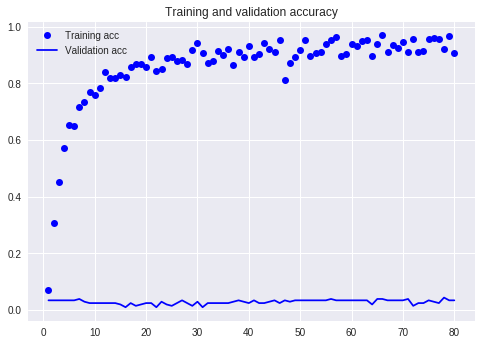

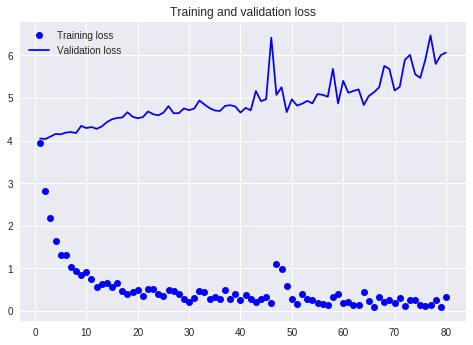

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()